# Playing with the visits table 

### Alex Lu | Summer Q 17-18  
---

September 2018

**OBJECTIVE**

---

I have been tasked with getting distributions of age, sex, for Arbor and PFC patients over the last year. This notebook examines the age and sex distributions from a visits paradigm (and not a unique'd patients paradigm). 

First, let's import all of the stuff that we'll need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from utils.indicator import *
from utils.file_ops import *
from datetime import datetime
%matplotlib inline

We want to filter on the time of visit for longitudinal visualization. First, we should do a conversion on the format of the time string to make it more workable. Then, we're going to make this new 'ts' column the index, and drop the string form VisitDate series. 

In [2]:
def time_filter(t1, t2, df):
    # accepts numerical tuples of form (year, mon, day)
    bound1 = datetime(*t1)
    bound2 = datetime(*t2)
    return df[bound1:bound2]

In [3]:
path_visits = "visits_data/both_clinics_2018_q4.csv"
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits.head()

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,DateFirstKnown,VisitDateTime,Sex
0,AFC,N0057186,64,ARBOR FOLLOW-UP VISIT,8/21/2016 8:36:23 AM,6/3/2018 9:00:00 AM,M
1,AFC,N0067320,20,LAB FOLLOW-UP NOTE,5/27/2018 8:47:12 AM,6/3/2018 9:20:52 AM,M
2,AFC,N0067376,20,LAB FOLLOW-UP NOTE,5/27/2018 10:10:26 AM,6/3/2018 9:33:07 AM,F
3,AFC,N0067344,20,LAB FOLLOW-UP NOTE,5/27/2018 9:59:43 AM,6/3/2018 9:35:50 AM,F
4,AFC,N0067508,20,ARBOR GENERAL VISIT,6/3/2018 8:44:35 AM,6/3/2018 9:45:00 AM,F


In [4]:
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
arbor_general_visits = df_visits[df_visits['VisitType'] == 'ARBOR GENERAL VISIT']
pfc_general_visits = df_visits[df_visits['VisitType'] == 'PFC NEW PATIENT VISIT']

print arbor_general_visits.describe()
print pfc_general_visits.describe()

        Age(Year)
count  277.000000
mean    48.007220
std     17.093518
min     18.000000
25%     32.000000
50%     49.000000
75%     63.000000
max     81.000000
        Age(Year)
count  175.000000
mean    48.348571
std     18.745381
min      4.000000
25%     29.000000
50%     52.000000
75%     63.000000
max     95.000000


In [5]:
arbor_general_visits.head(5)

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-06-03 09:45:00,AFC,N0067508,20,ARBOR GENERAL VISIT,F,2018-06-03 09:45:00,2018-06-03 08:44:35
2018-06-03 09:45:00,AFC,N0067515,20,ARBOR GENERAL VISIT,F,2018-06-03 09:45:00,2018-06-03 08:46:56
2018-06-03 09:45:00,AFC,N0067522,25,ARBOR GENERAL VISIT,F,2018-06-03 09:45:00,2018-06-03 09:04:32
2018-06-03 09:45:00,AFC,N0051120,67,ARBOR GENERAL VISIT,M,2018-06-03 09:45:00,2015-09-27 10:08:41
2018-06-03 10:00:00,AFC,N0067110,56,ARBOR GENERAL VISIT,F,2018-06-03 10:00:00,2018-05-20 08:51:31


Let's take a look and make sure we're looking at the right stuff

In [6]:
def temporal_distribution(df, ts_name = 'ts'):
    '''

    '''
    time_gb = df.groupby(df[ts_name].dt.month)
    plt.figure()
    time_gb.plot()
    plt.show()


In [7]:
arbor_general_visits['Sex'].value_counts(normalize=True)

F    0.440433
M    0.429603
U    0.129964
Name: Sex, dtype: float64

In [8]:
pfc_general_visits['Sex'].value_counts(normalize=True)

F    0.582857
M    0.360000
U    0.057143
Name: Sex, dtype: float64

In [9]:
arbor_general_visits['Age(Year)'].value_counts(bins=10)

(62.1, 68.4]      42
(55.8, 62.1]      36
(30.6, 36.9]      34
(17.936, 24.3]    31
(36.9, 43.2]      29
(49.5, 55.8]      27
(43.2, 49.5]      26
(24.3, 30.6]      22
(68.4, 74.7]      18
(74.7, 81.0]      12
Name: Age(Year), dtype: int64

In [10]:
pfc_general_visits['Age(Year)'].value_counts(bins=10)

(22.2, 31.3]     42
(58.6, 67.7]     38
(49.5, 58.6]     28
(31.3, 40.4]     17
(40.4, 49.5]     16
(67.7, 76.8]     15
(76.8, 85.9]      9
(13.1, 22.2]      7
(85.9, 95.0]      2
(3.908, 13.1]     1
Name: Age(Year), dtype: int64

In [11]:
pfc_general_visits[pfc_general_visits['Age(Year)'] < 18]

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-07-05 10:00:00,PFC,N0041335,4,PFC NEW PATIENT VISIT,F,2018-07-05 10:00:00,2014-08-24 19:51:32


In [12]:
arbor_visits_clean = arbor_general_visits[arbor_general_visits['Age(Year)'] > 18]
pfc_visits_clean = pfc_general_visits[pfc_general_visits['Age(Year)'] > 18]

In [13]:
arbor_visits_clean['Sex'].value_counts()

F    121
M    118
U     36
Name: Sex, dtype: int64

In [14]:
pfc_visits_clean['Sex'].value_counts()

F    101
M     62
U     10
Name: Sex, dtype: int64

In [15]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.936999999999998, 25.2]    35
(25.2, 31.4]                  26
(31.4, 37.6]                  27
(37.6, 43.8]                  26
(43.8, 50.0]                  34
(50.0, 56.2]                  23
(56.2, 62.4]                  32
(62.4, 68.6]                  42
(68.6, 74.8]                  18
(74.8, 81.0]                  12
Name: Age(Year), dtype: int64

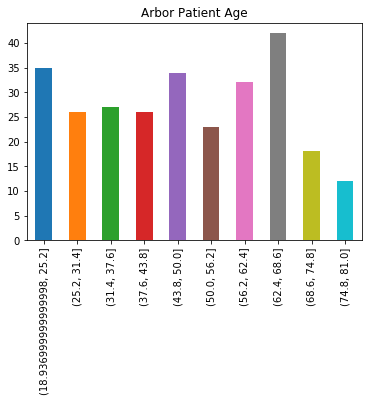

In [16]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='Arbor Patient Age')

In [17]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.923, 26.6]    32
(26.6, 34.2]      23
(34.2, 41.8]      10
(41.8, 49.4]      16
(49.4, 57.0]      26
(57.0, 64.6]      31
(64.6, 72.2]      18
(72.2, 79.8]      10
(79.8, 87.4]       5
(87.4, 95.0]       2
Name: Age(Year), dtype: int64

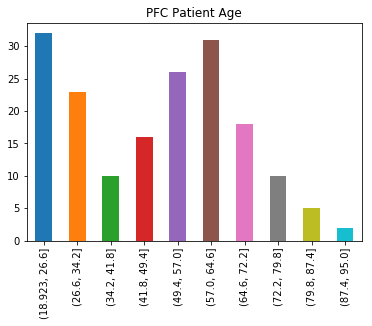

In [18]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='PFC Patient Age')

In [19]:
arbor_visits_clean['Age(Year)'].describe()

count    275.000000
mean      48.225455
std       16.961745
min       19.000000
25%       33.000000
50%       49.000000
75%       63.000000
max       81.000000
Name: Age(Year), dtype: float64

In [20]:
pfc_visits_clean['Age(Year)'].describe()

count    173.000000
mean      48.780347
std       18.398315
min       19.000000
25%       29.000000
50%       52.000000
75%       63.000000
max       95.000000
Name: Age(Year), dtype: float64

In [21]:
arbor_visits_clean['PatientNumber'].describe()

count          275
unique         243
top       N0068026
freq             4
Name: PatientNumber, dtype: object

In [22]:
pfc_visits_clean['PatientNumber'].describe()

count          173
unique         169
top       N0062660
freq             2
Name: PatientNumber, dtype: object

In [23]:
arbor_visits_clean.groupby(arbor_visits_clean['PatientNumber']).size().describe()

count    243.000000
mean       1.131687
std        0.395146
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
dtype: float64

In [24]:
pfc_visits_clean.groupby(pfc_visits_clean['PatientNumber']).size().describe()

count    169.000000
mean       1.023669
std        0.152466
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
dtype: float64

In [25]:
def get_grouped_data(df, column, group_keys=None, summed=True):
    grouped = df.groupby(df[column])
    visits_per_group = [] if group_keys is None else np.zeros(len(group_keys))
    if group_keys is not None:
        for c, group in enumerate(group_keys):
            if group in grouped.groups:
                visits_per_group[c] = len(grouped.groups[group])
    else:
        for group in grouped.groups:
            visits_per_group.append(len(grouped.groups[group]))
        
    if summed:
        return np.sum(visits_per_group)
    else:
        return visits_per_group

In [26]:
def visits_periodic(df, period='mom', group_keys=None):
    
    periodic_visits = []
    time_points = []
    spec_usage_mom = []
    
    if period == 'mom':
        months = [val for val in range(1, 13)]
        years = [2017, 2018]
        for year in years:
            for begin_month in months:
                tp1 = (year, begin_month, 1)
                tp2 = ()
                if begin_month == 12:
                    tp2 = (year+1, 1, 1)
                else:
                    tp2 = (year, begin_month+1, 1)
                    
                filtered = time_filter(tp1,tp2, df)
                
                if filtered.values.shape[0] == 0:
                    continue
                else:
                    periodic_visits.append(get_grouped_data(filtered, 'PatientNumber'))
                    spec_usage_mom.append(get_grouped_data(filtered, 'VisitType', group_keys = group_keys, summed=False))
                    time_points.append(str(begin_month) + '/' + str(year))
                    

    return (periodic_visits, np.array(spec_usage_mom), time_points)

In [27]:
arbor_spec_clinics = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'LAB FOLLOW-UP NOTE'
    ]


periodic_visits, spec_usage_mom, time_points = visits_periodic(arbor_visits_clean, 
                                                               group_keys=arbor_spec_clinics)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

arbor_specialty_clinics_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(arbor_spec_clinics, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

arbor_specialty_clinics_df.head(12)


KeyError: 1483228800000000000

In [ ]:
arbor_date_grouped = arbor_visits_clean.groupby(pd.Grouper(key='VisitDateTimeTS', freq='W-SUN'))
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(arbor_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'), arbor_date_grouped['PatientNumber'].count().values)
plt.xticks(rotation=90)
ax.grid(True)
plt.title('Number of Arbor General Visits, Week over Week')
plt.xlabel('Clinic Date')
plt.ylabel('Number of Patients')
plt.ylim([0, 18])

In [ ]:
pfc_date_grouped = pfc_visits_clean.groupby(pd.Grouper(key='VisitDateTimeTS', freq='W-SUN'))
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(pfc_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'), pfc_date_grouped['PatientNumber'].count().values)
plt.xticks(rotation=90)
ax.grid(True)
plt.title('Number of PFC New Patient Visits, Week over Week')
plt.xlabel('Clinic Date')
plt.ylabel('Number of Patients')
plt.ylim([0, 18])

In [ ]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=arbor_date_grouped['PatientNumber'].count(), ax=ax)
ax.set_xticks(arbor_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'))

In [ ]:
arbor_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=12)

In [ ]:
pfc_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=12)

In [ ]:
grouped = pfc_visits_clean.groupby('VisitType')
for g in grouped.groups:
    print g
    print len(grouped.groups[g])

In [ ]:
arbor_visits_clean.groupby('VisitType').size()

In [ ]:
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
df_visits_clean = df_visits[df_visits['Age(Year)']> 18]
df_visits_clean.sort_values('VisitDateTimeTS', inplace=True)

In [ ]:
df_visits_clean.groupby('VisitType').size()

In [ ]:
ALL_SPEC_KEYS = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'PFC DERMATOLOGY VISIT',
    'PFC FOLLOW UP VISIT',
    'PFC HEP CLINIC VISIT',
    'PFC MENTAL HEALTH VISIT',
    'PFC NEW PATIENT VISIT',
    'PFC OPHTHALMOLOGY VISIT',
    "PFC WOMEN'S CLINIC VISIT",
    'PFC FAST TRACK VACCINE'
]


periodic_visits, spec_usage_mom, time_points = visits_periodic(df_visits_clean, 
                                                               group_keys=ALL_SPEC_KEYS)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

joint_spec_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(ALL_SPEC_KEYS, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

joint_spec_df.head(20)


In [ ]:
joint_spec_df.to_csv('joint_spec_clinics.csv')